Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.


In [77]:
dataset = 'https://www.kaggle.com/datasets/henrysue/online-shoppers-intention'

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import six
# from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [79]:
df = pd.read_csv('online_shoppers_intention.csv')

In [80]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [81]:
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [82]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [83]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

It is clearly visible that the dataset is imbalanced. Since we are going to use random forest algorithm and random forest is inherently better at handling imbalanced datasets, and it performs well in such scenario. Therefore I am using the data set without handling imbalance in it.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [85]:
data = df.copy()

In [86]:
# finding numerical features
num_col = []
for column in data:
    if type(data[column][0]) == np.float64 or type(data[column][0]) == np.int64:
        num_col.append(column)

In [87]:
len(num_col)

14

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

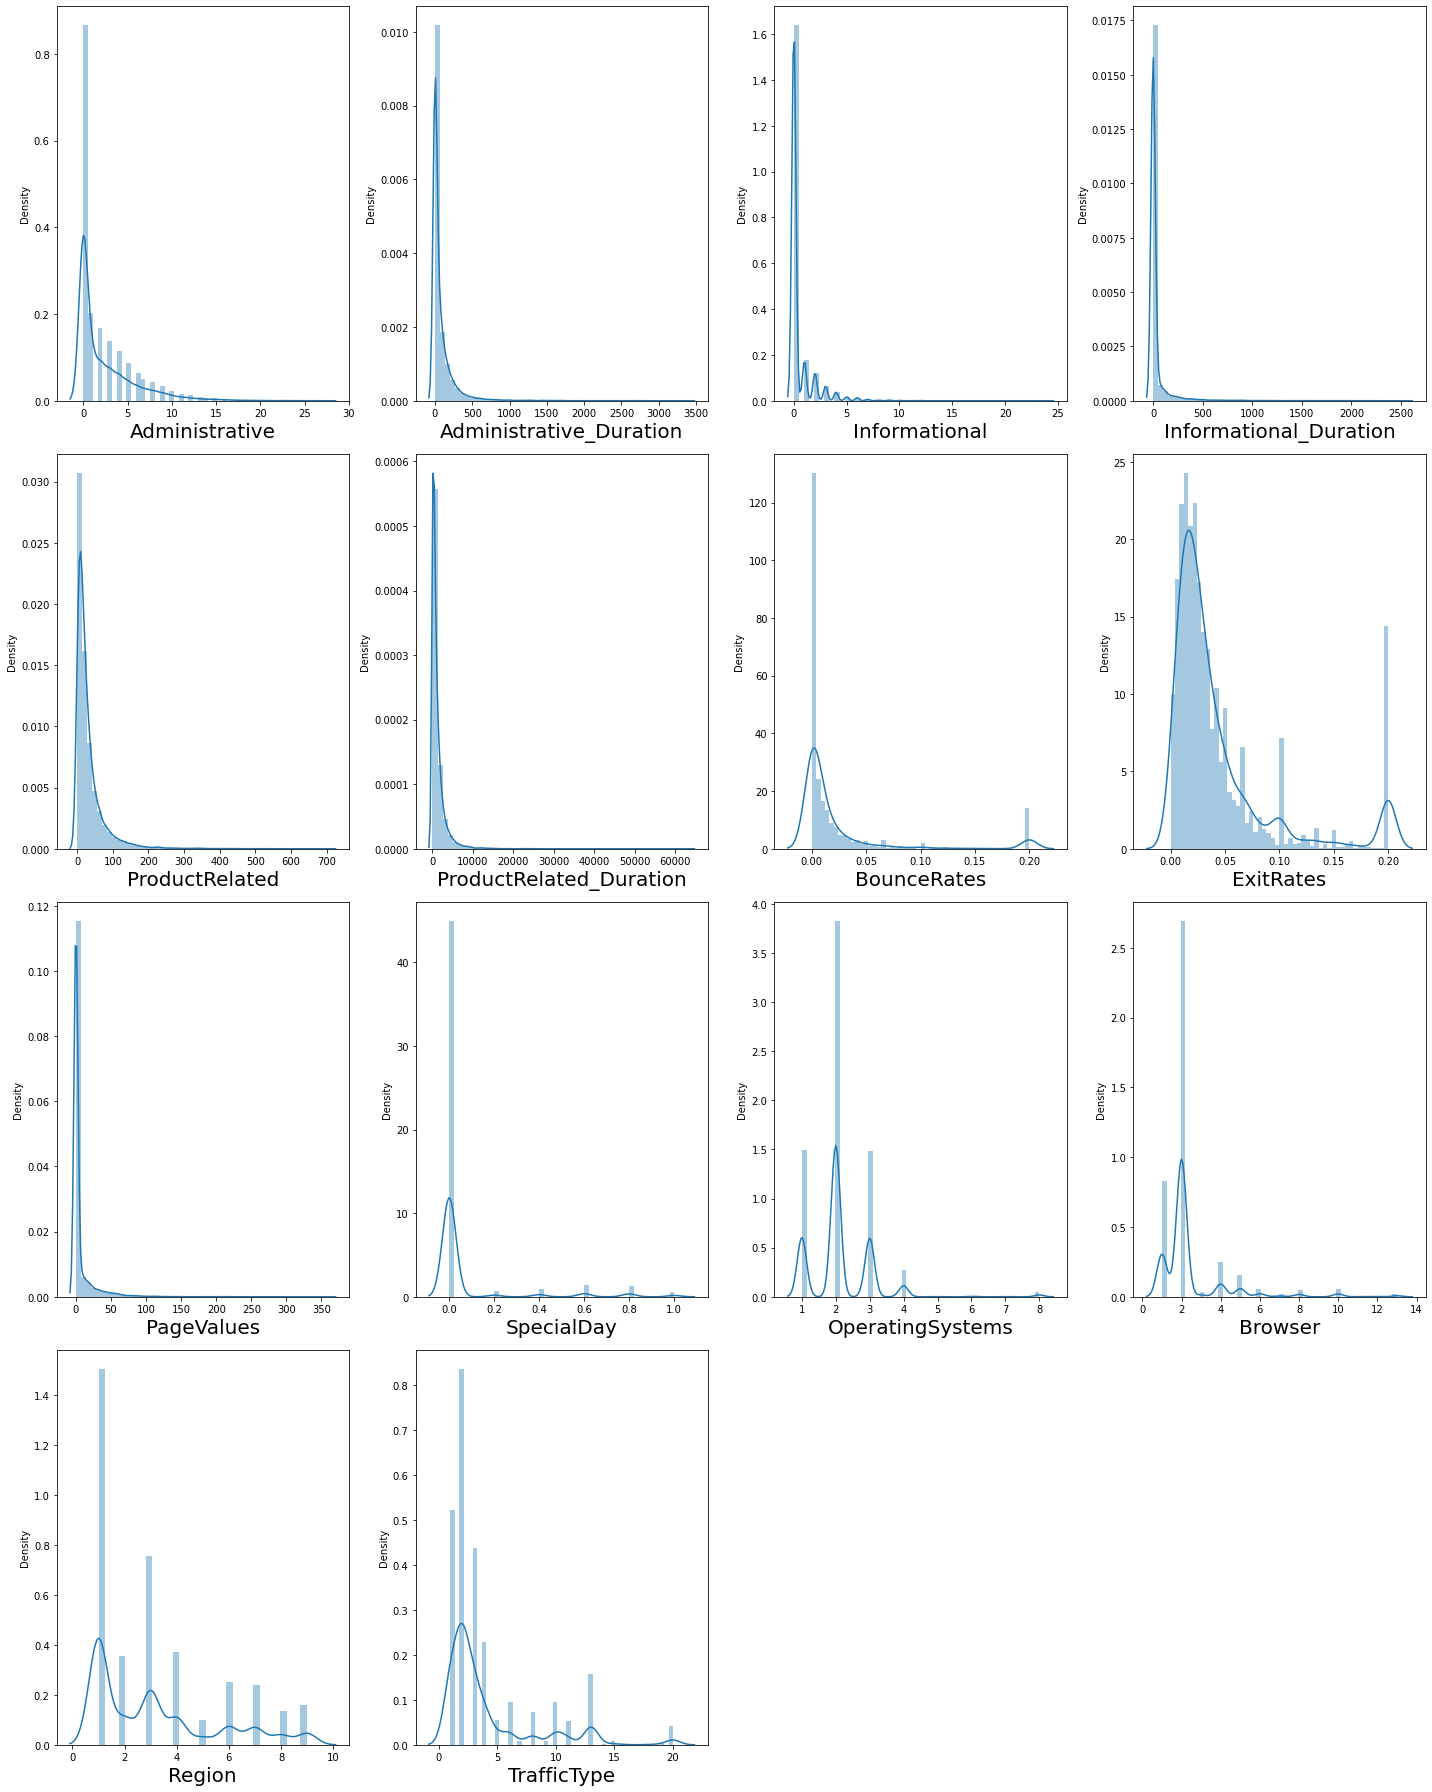

In [88]:
# checking the distribution of numerical features
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in num_col:
     if plotnumber<=14:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.tight_layout()         

we can see that features are skewed. So we will try to decrease the skewness.

In [89]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [90]:
# removing 2% data from the Administrative feature
q = data['Administrative'].quantile(0.98)
data_cleaned = data[data['Administrative']<q]

# removing 5% data from the Administrative_Duration feature
q = data_cleaned['Administrative_Duration'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Administrative_Duration']<q]

q = data_cleaned['Informational_Duration'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Informational_Duration']<q]

q = data_cleaned['Informational'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Informational']<q]

q = data_cleaned['ProductRelated'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['ProductRelated']<q]

q = data_cleaned['ProductRelated_Duration'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['ProductRelated_Duration']<q]

q = data_cleaned['PageValues'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['PageValues']<q]

In [91]:
data_cleaned.shape

(9499, 18)

C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shailendra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

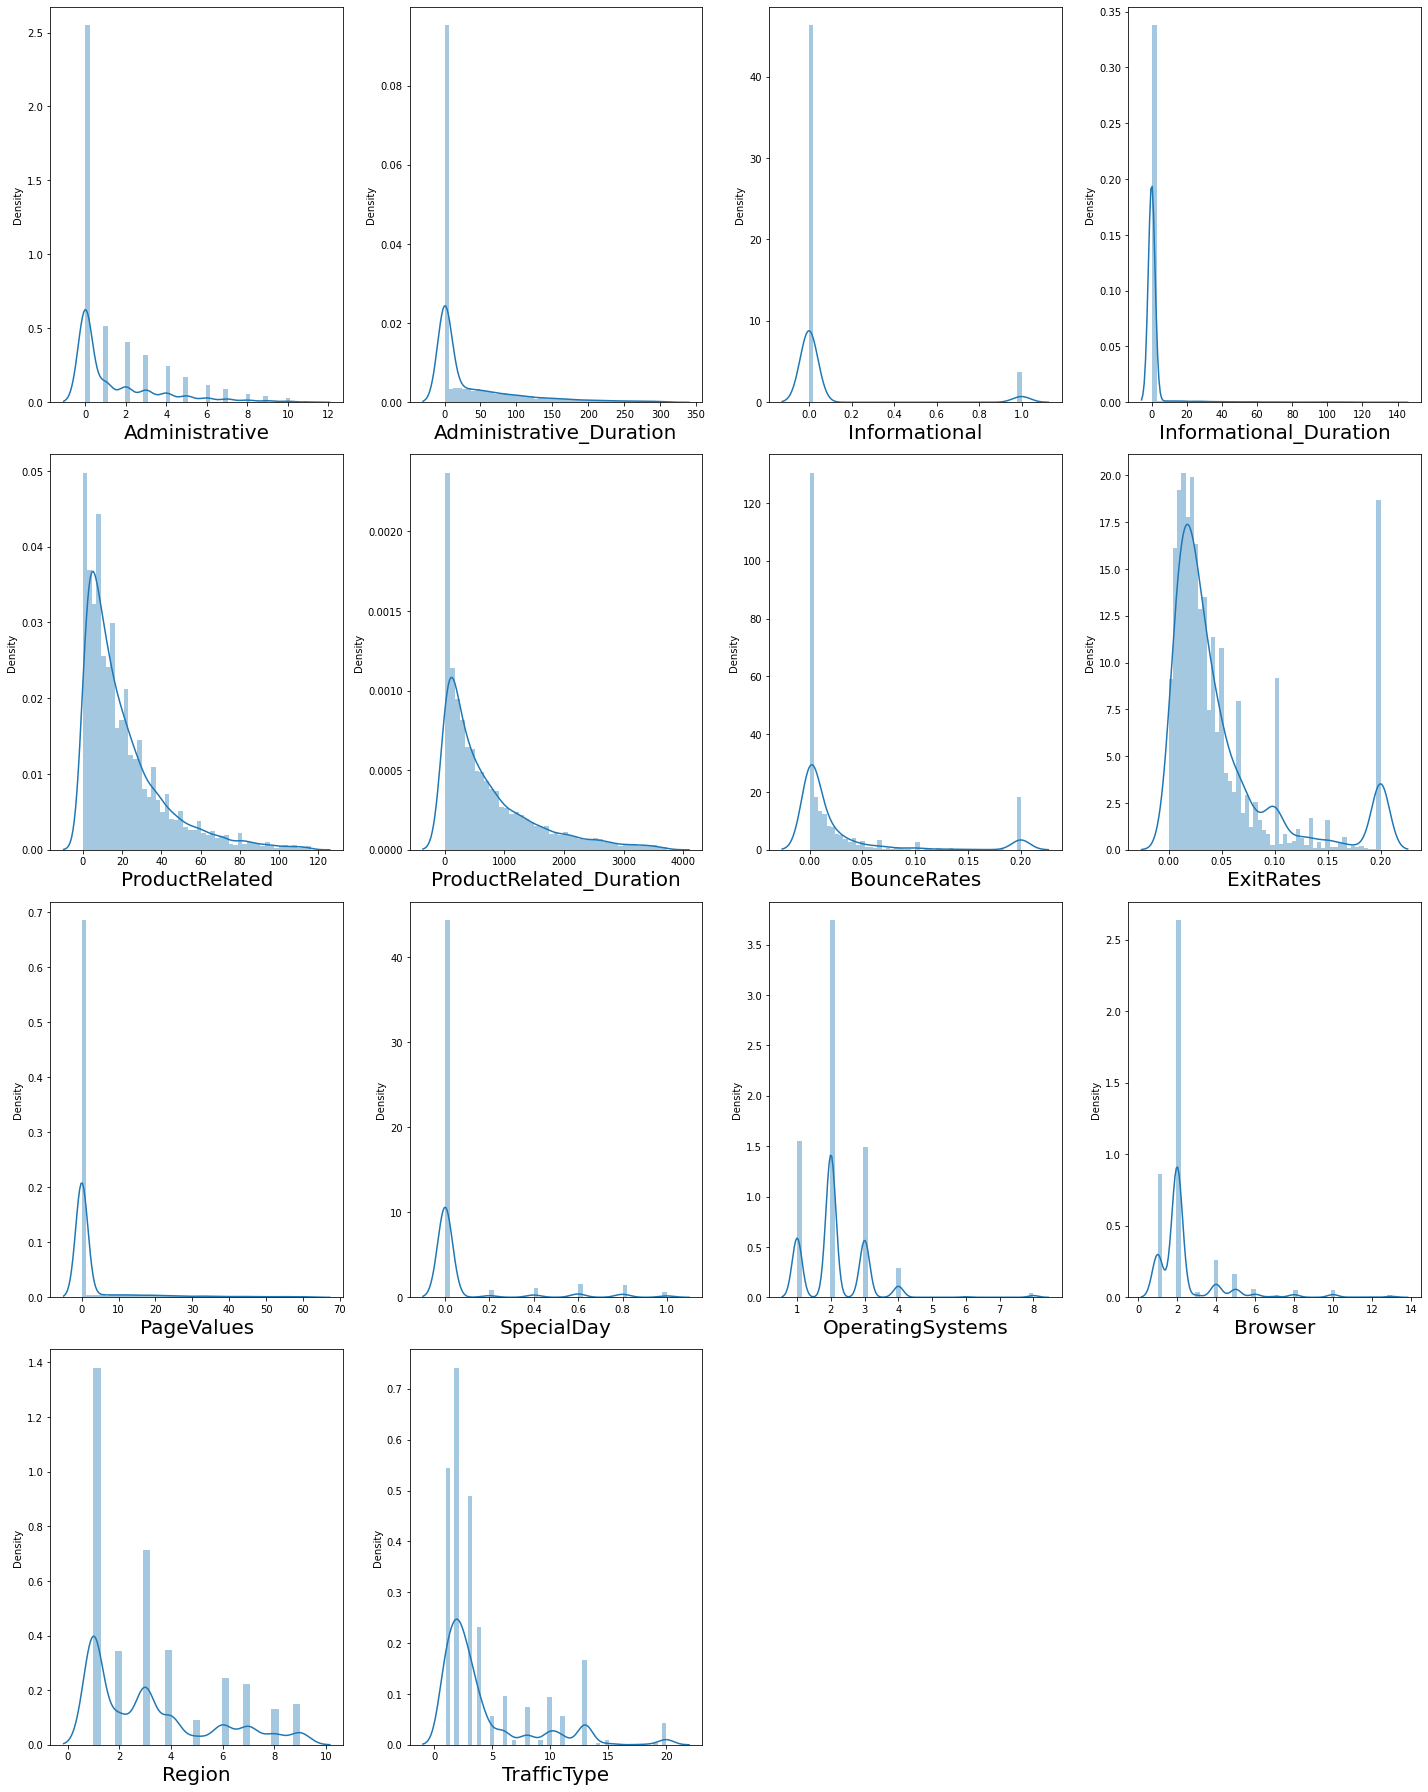

In [92]:
# checking the distribution of numerical features after handling skewness
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in num_col:
     if plotnumber<=14:
            ax = plt.subplot(4,4,plotnumber)
            sns.distplot(data_cleaned[column])
            plt.xlabel(column,fontsize=20)
            plotnumber+=1
plt.tight_layout()         

As we can see skewness has reduced. The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our
model doesn't work with accuracy, we will come back for more preprocessing.

In [93]:
data_cleaned.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499,9499.000000,9499.000000,9499.000000,9499.000000,9499,9499,9499
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2733,NaN,NaN,NaN,NaN,8058,7360,8396
mean,1.455837,36.672419,0.074218,2.204764,20.343299,701.045323,0.026692,0.049423,3.375488,0.068344,NaN,2.121697,2.364670,3.168755,4.145594,NaN,NaN,NaN
std,2.235744,62.598681,0.262140,12.006219,20.323716,768.139766,0.054127,0.053071,10.232834,0.208220,NaN,0.920012,1.723666,2.403858,4.071451,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,6.000000,129.000000,0.000000,0.015449,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,14.000000,429.916667,0.002500,0.029412,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,3.000000,NaN,NaN,NaN
75%,2.000000,53.083333,0.000000,0.000000,28.000000,1011.409722,0.022222,0.058333,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [94]:
# introduce dummy variable for categorical features
dt = pd.get_dummies(data_cleaned,drop_first=True)

In [95]:
dt.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [97]:
# selecting dependent and independet features for building multi output classification model
X = dt.drop(columns = ['Revenue','Weekend'])
y = dt[['Revenue','Weekend']]      # Revenue and Weekend are output features

In [100]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [101]:
rand_clf = RandomForestClassifier(random_state=6)

In [102]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [103]:
rand_clf.score(x_test,y_test)

0.724561403508772

The model accuracy score for predicting the revenue and weekend is 72.45%.

#### Now let's try to make prediction for some data

In [115]:
# we will try to see the prediction for these data
X.iloc[240:247,:]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
269,0,0.0,0,0.0,6,236.500000,0.000000,0.016667,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
270,1,10.0,0,0.0,14,348.666667,0.035714,0.053571,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
271,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
272,1,28.0,1,47.0,13,224.500000,0.000000,0.014286,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
273,4,27.0,0,0.0,42,601.766667,0.000000,0.004545,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
274,0,0.0,0,0.0,5,75.500000,0.020000,0.013333,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
275,0,0.0,0,0.0,2,153.000000,0.000000,0.050000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [113]:
y.iloc[240:247,:]    # these should be the predictions from the model

,Revenue,Weekend
269,False,True
270,False,True
271,False,False
272,False,False
273,False,False
274,False,True
275,False,False


In [114]:
# declaring the above records as a test data to get predictions from the model
test_data = X.iloc[240:247,:]

In [116]:
rand_clf.predict(test_data)

array([[False,  True],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

These are the predictions from the model. The model predicted correclty for all the data, except for one, which is great.